In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math
%matplotlib inline

In [2]:
df = sns.load_dataset('tips')
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [3]:
df['sex'].value_counts()

Male      157
Female     87
Name: sex, dtype: int64

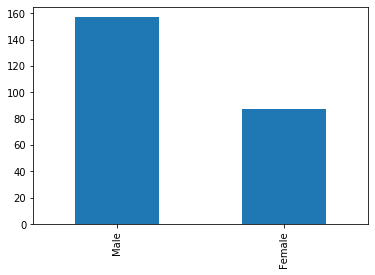

In [6]:
df['sex'].value_counts().plot(kind='bar')
plt.show()

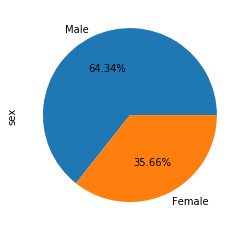

In [11]:
df['sex'].value_counts().plot(kind='pie',autopct='%1.2f%%')

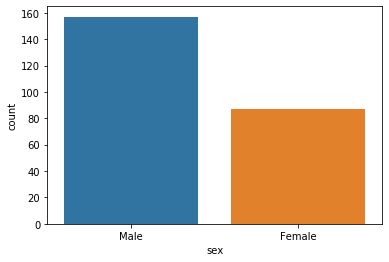

In [12]:
sns.countplot(df['sex'])

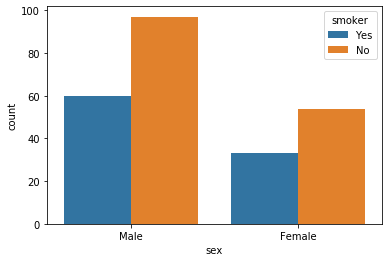

In [13]:
sns.countplot(x='sex',hue='smoker',data=df)

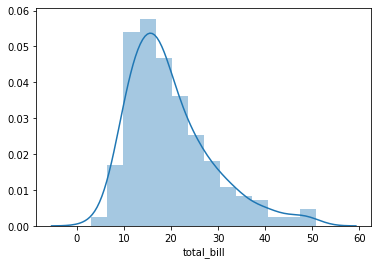

In [14]:
sns.distplot(df['total_bill'])

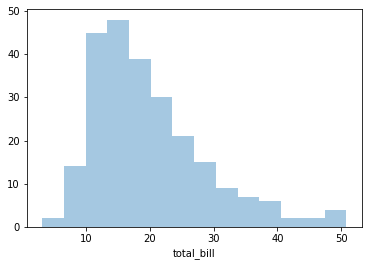

In [15]:
sns.distplot(df['total_bill'],kde=False)

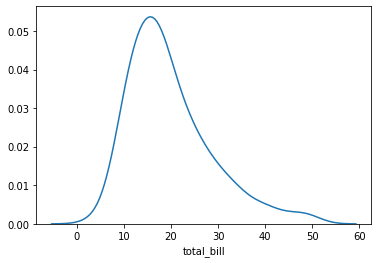

In [16]:
sns.distplot(df['total_bill'],hist=False)

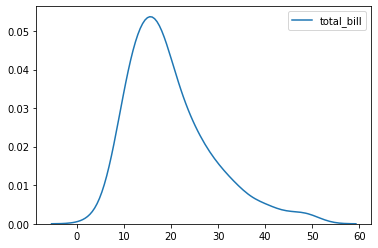

In [17]:
sns.kdeplot(df['total_bill'])

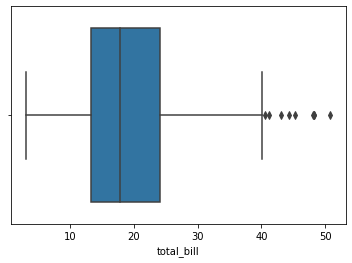

In [18]:
sns.boxplot(df['total_bill'])

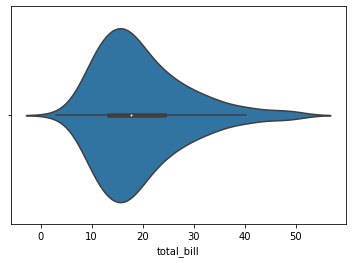

In [19]:
sns.violinplot(df['total_bill'])

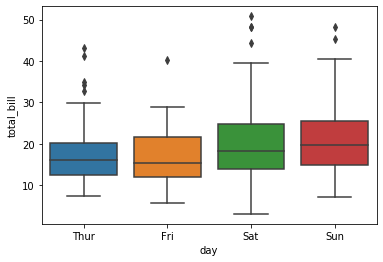

In [20]:
sns.boxplot(x='day',y='total_bill',data=df)

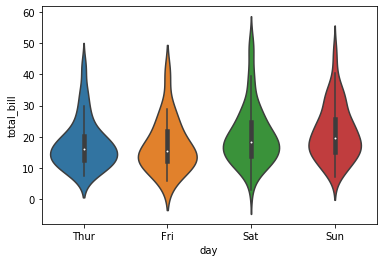

In [21]:
sns.violinplot(x='day',y='total_bill',data=df)

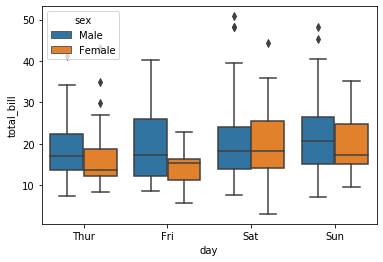

In [23]:
sns.boxplot(x='day',y='total_bill',hue='sex',data=df)

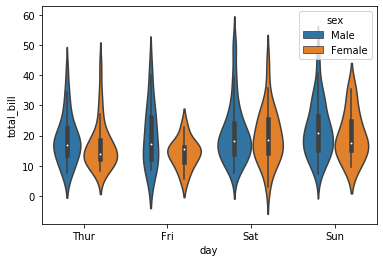

In [24]:
sns.violinplot(x='day',y='total_bill',hue='sex',data=df)

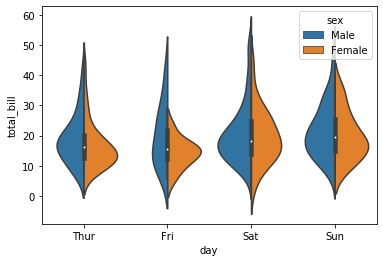

In [25]:
sns.violinplot(x='day',y='total_bill',hue='sex',split=True,data=df)

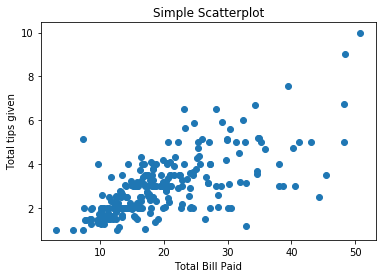

In [26]:
plt.scatter(df['total_bill'],df['tip'])
plt.xlabel('Total Bill Paid')
plt.ylabel('Total tips given')
plt.title('Simple Scatterplot')
plt.show()

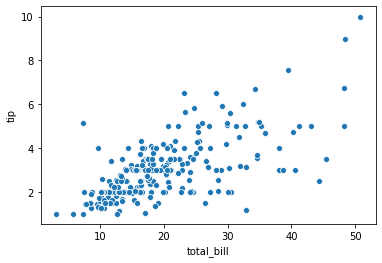

In [27]:
sns.scatterplot(x='total_bill',y='tip',data=df)

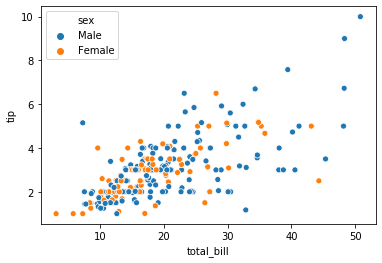

In [28]:
sns.scatterplot(x='total_bill',y='tip',data=df,hue='sex')

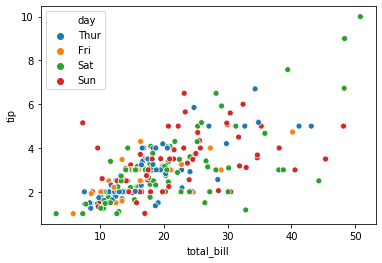

In [29]:
sns.scatterplot(x='total_bill',y='tip',data=df,hue='day')

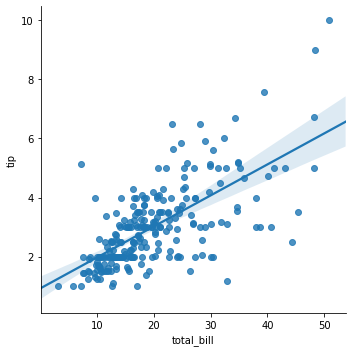

In [30]:
sns.lmplot(x='total_bill',y='tip',data=df)

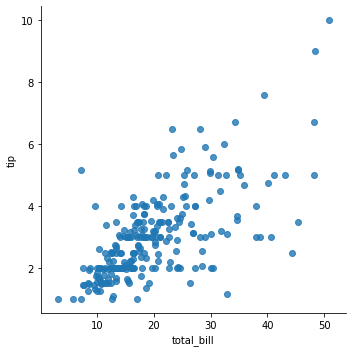

In [31]:
sns.lmplot(x='total_bill',y='tip',data=df,fit_reg=False)

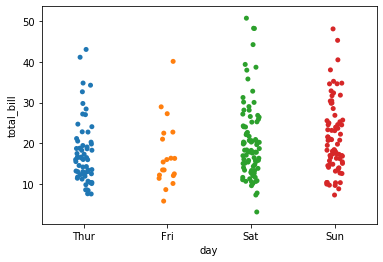

In [33]:
sns.stripplot(x='day',y='total_bill',data=df)

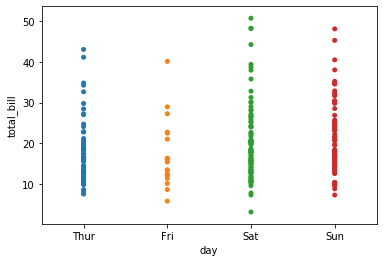

In [34]:
sns.stripplot(x='day',y='total_bill',data=df,jitter=False)

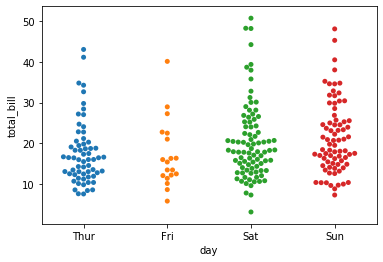

In [35]:
sns.swarmplot(x='day',y='total_bill',data=df)

In [36]:
from scipy.stats import probplot

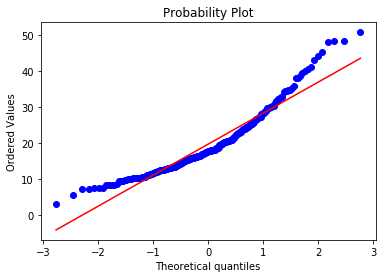

In [37]:
probplot(df['total_bill'],plot=plt)
plt.show()

In [40]:
!pip install seaborn_qqplot

In [42]:
from seaborn_qqplot import qqplot

ImportError: cannot import name 'qqplot' from 'seaborn_qqplot' (D:\Anaconda\lib\site-packages\seaborn_qqplot\__init__.py)

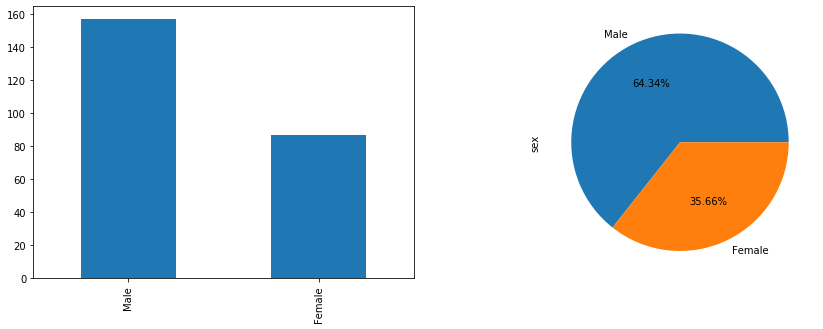

In [3]:
fig, axes = plt.subplots(1,2,figsize=(15,5))
df['sex'].value_counts().plot(kind='bar',ax=axes[0])
df['sex'].value_counts().plot(kind='pie',ax=axes[1],autopct='%1.2f%%')
plt.show()

In [ ]:
l = ['Hormonal Contraceptives','IUD','STDs','STDs:condylomatosis','Smokes','Dx:Cancer','Dx:CIN','Dx:HPV','Dx','Hinselmann','Schiller','Citology']
fig,axes = plt.subplots(4,3,figsize=(15,5))
c=0
while c < len(l):
    for i in range(4):
        for j in range(3):
            sns.countplot(df[l[c]] , ax=axes[i][j])
            c += 1

-----------------------------------------

In [3]:
df1 = pd.read_csv('https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/06_Stats/US_Baby_Names/US_Baby_Names_right.csv')
df1.head()

,Unnamed: 0,Id,Name,Year,Gender,State,Count
0,11349,11350,Emma,2004,F,AK,62
1,11350,11351,Madison,2004,F,AK,48
2,11351,11352,Hannah,2004,F,AK,46
3,11352,11353,Grace,2004,F,AK,44
4,11353,11354,Emily,2004,F,AK,41


In [4]:
df1.drop('Unnamed: 0',axis=1,inplace=True)
df1.head()

,Id,Name,Year,Gender,State,Count
0,11350,Emma,2004,F,AK,62
1,11351,Madison,2004,F,AK,48
2,11352,Hannah,2004,F,AK,46
3,11353,Grace,2004,F,AK,44
4,11354,Emily,2004,F,AK,41


In [6]:
df1.shape

(1016395, 6)

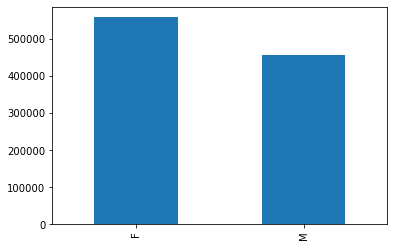

In [7]:
df1['Gender'].value_counts().plot(kind='bar')

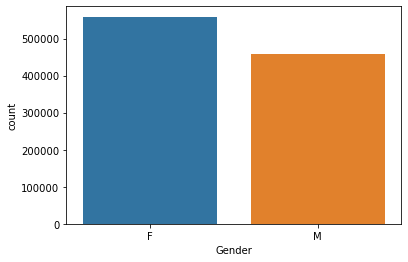

In [8]:
sns.countplot(df1['Gender'])

In [11]:
df1.groupby('Name').count()['Id'].nlargest(5)

Name
Riley     1112
Avery     1080
Jordan    1073
Peyton    1064
Hayden    1049
Name: Id, dtype: int64

In [18]:
df1.iloc[math.floor(df1.shape[0]/2)]['Name']

'Kasey'

In [19]:
df1['Name'].mode()[0]

'Riley'

In [24]:
df1.groupby('State')['Count'].sum()

State
AK      63649
AL     475422
AR     292659
AZ     808258
CA    5084647
CO     574230
CT     312747
DC      82504
DE      73060
FL    1976379
GA    1185168
HI      90406
IA     318773
ID     167128
IL    1486991
IN     753487
KS     327040
KY     460790
LA     493505
MA     638232
MD     585246
ME      99368
MI    1038080
MN     595801
MO     672772
MS     288143
MT      75765
NC    1078680
ND      69561
NE     201367
NH     101547
NJ     913330
NM     198657
NV     279767
NY    2208154
OH    1286370
OK     413580
OR     381556
PA    1276091
RI      83499
SC     435359
SD      79547
TN     735102
TX    3791675
UT     448216
VA     872376
VT      36432
WA     730321
WI     576679
WV     167357
WY      36019
Name: Count, dtype: int64

In [37]:
df2 = df1.pivot_table(index=['State','Gender'], aggfunc='sum')[['Count']]
df2

Count
State Gender        
AK    F        26250
      M        37399
AL    F       215308
      M       260114
AR    F       129712
...              ...
WI    M       311758
WV    F        73800
      M        93557
WY    F        14107
      M        21912

[102 rows x 1 columns]